In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### *그래프 사이즈 설정

In [2]:
plt.rcParams['figure.figsize'] = [6, 6]

# seaborn 

In [3]:
import seaborn as sns

### *seaborn 옵션

https://seaborn.pydata.org/tutorial.html

In [4]:
sns.set(palette="deep") # 색상(muted, bright, deep, colorblind, dark)
sns.set(style="whitegrid") # 배경(darkgrid, whitegrid, dark, white, ticks)
sns.despine(offset=10, trim=True) 

<Figure size 432x432 with 0 Axes>

### 샘플 데이터 로드

In [5]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
ti = sns.load_dataset("titanic")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")

In [6]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1. 실수형 데이터

### 1) 1차원 실수형 데이터

#### - 러그 플롯: 데이터 위치를 x축 위에 선분으로 나타내어 실제 데이터들의 위치를 보여준다

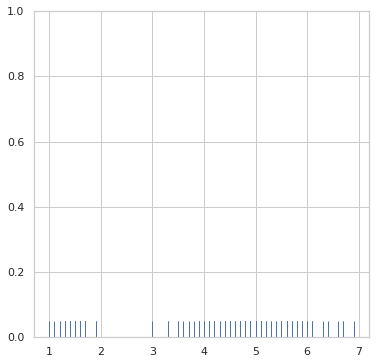

In [7]:
sns.rugplot(iris.petal_length.values)

#### - 커널 밀도: 히스토그램보다 부드러운 형태의 분포 곡선

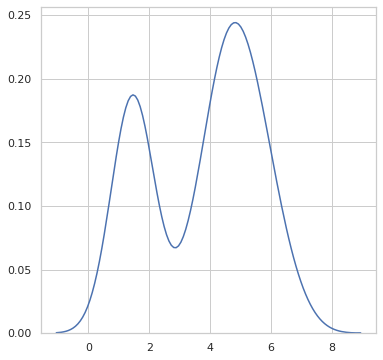

In [8]:
sns.kdeplot(iris.petal_length.values)

#### - distplot: 러그 + 커널 밀도

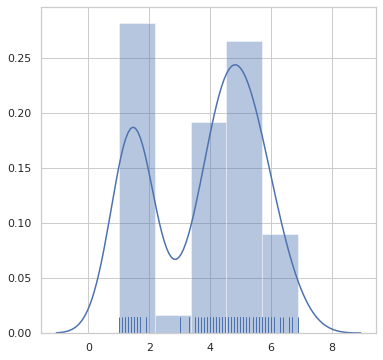

In [9]:
sns.distplot(iris.petal_length.values, kde=True, rug=True)

#### - 카운트 플롯

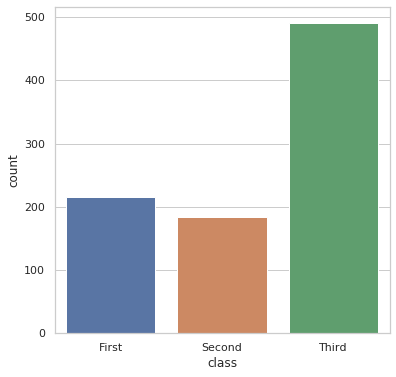

In [10]:
sns.countplot(x="class", data=ti)

### 2) 다차원 실수형 데이터

### 2.1) 산점도

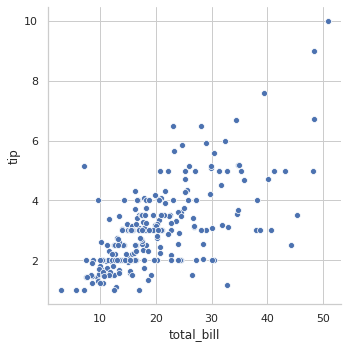

In [11]:
sns.relplot(x="total_bill", y="tip", data=tips)

#### - 카테고리형 데이터

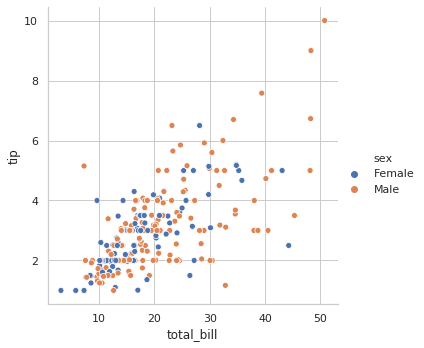

In [12]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips) # hue:카테고리별 색상

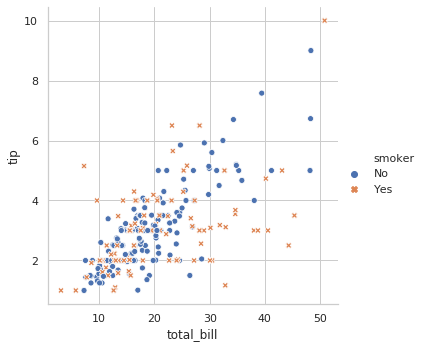

In [13]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips) # style:카테고리별 모양

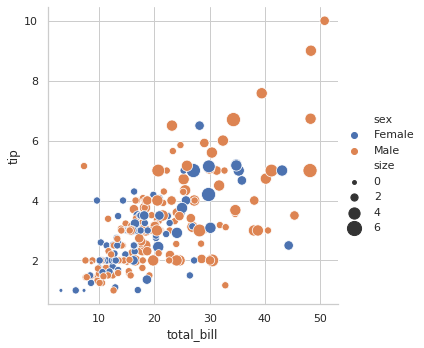

In [14]:
sns.relplot(x="total_bill", y="tip", hue="sex", size="size", sizes=(15,200), data=tips) # size:실수형 카테고리, sizes:점 크기

#### - joinplot: 산점도 + 변수 히스토그램

Text(0.5, 1.02, 'Joint Plot')

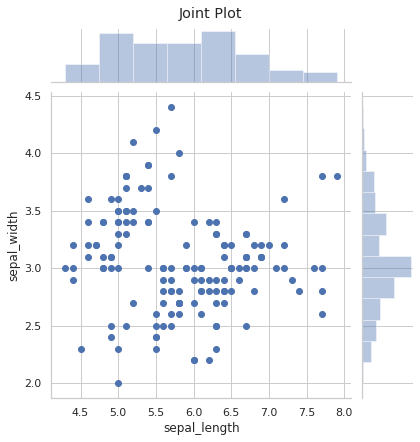

In [15]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris) # joinplot:산점도+각 변수의 히스토그램
plt.suptitle("Joint Plot", y=1.02)

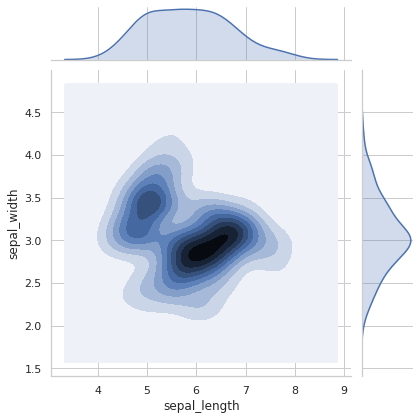

In [16]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde") # kind="kde":커널 밀도 히스토그램

### 2.2) 라인 그래프

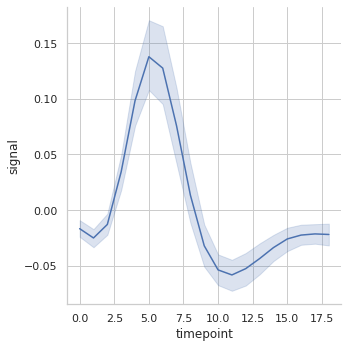

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

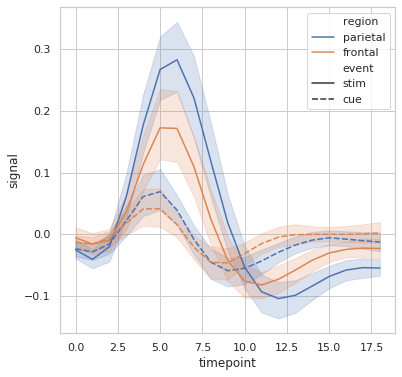

In [18]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

### 2.3) 다차원 그래프

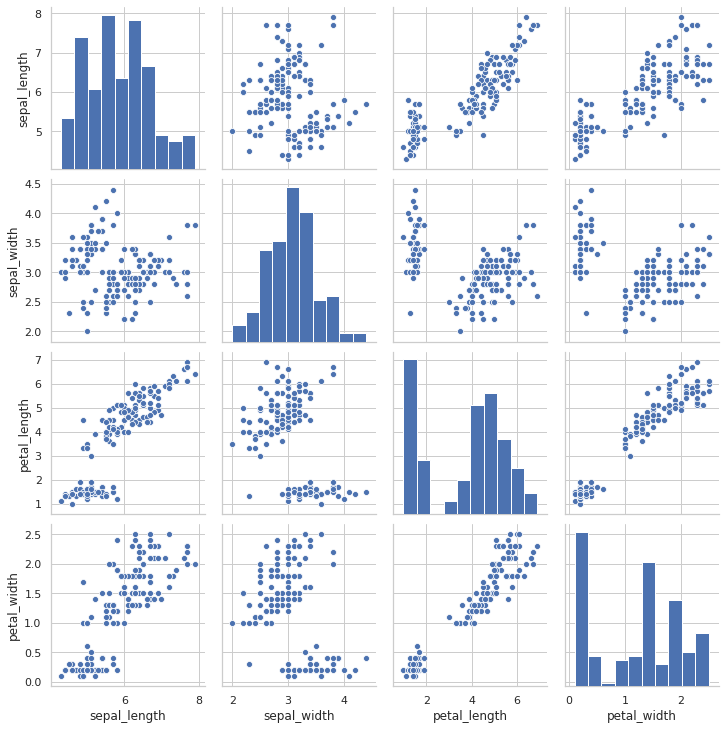

In [19]:
sns.pairplot(iris)

In [20]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6

SyntaxError: unexpected EOF while parsing (<ipython-input-20-eff038470ad0>, line 3)

#### - 카테고리형 데이터

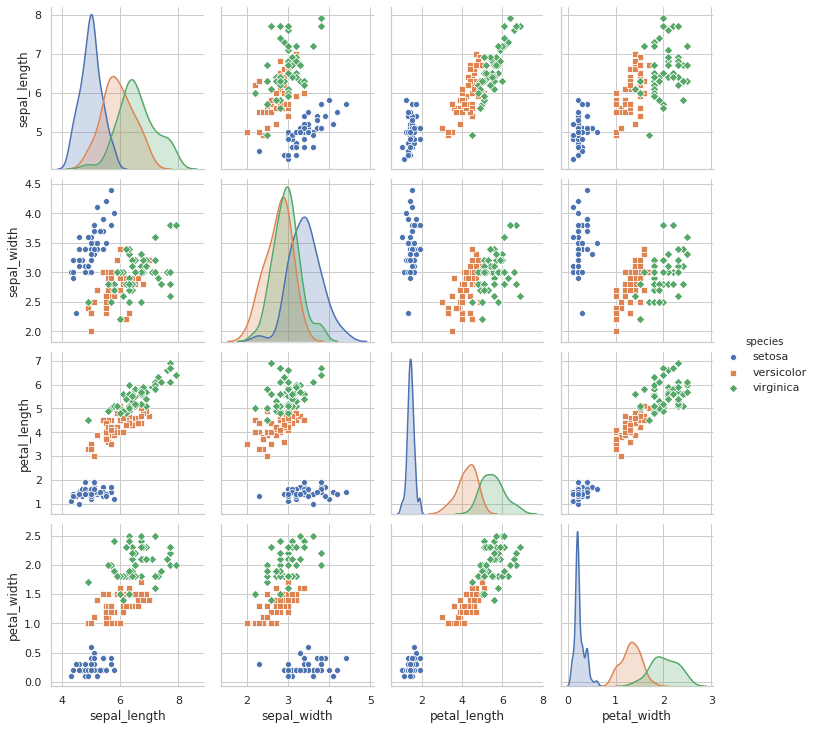

In [21]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"]) # makers:점 모양 선택

## 2. 2차원 카테고리 데이터

### 1) 히트맵

In [22]:
ti_size = ti.pivot_table(index="class", columns="sex", aggfunc="size")
ti_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


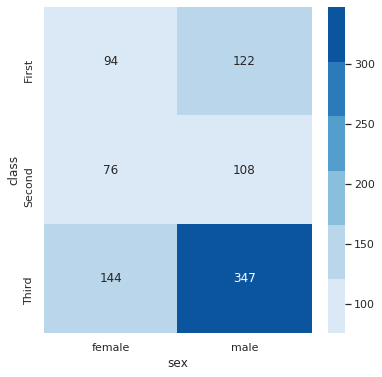

In [23]:
sns.heatmap(ti_size, cmap= sns.color_palette("Blues"), annot=True, fmt="d") # cmap:색상

## 5. 복합 데이터

### 1) 범주형 산점도

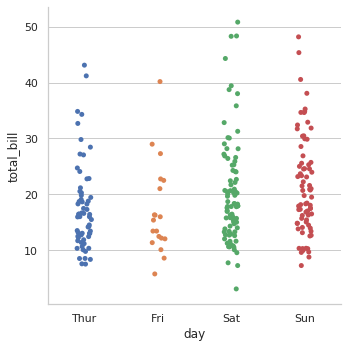

In [24]:
sns.catplot(x="day", y="total_bill", data=tips)

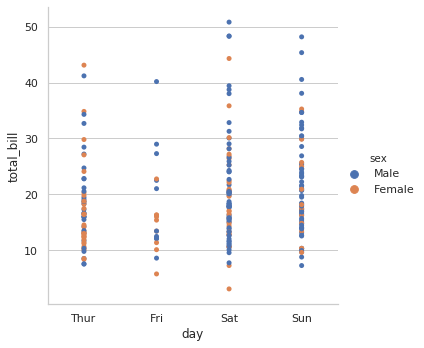

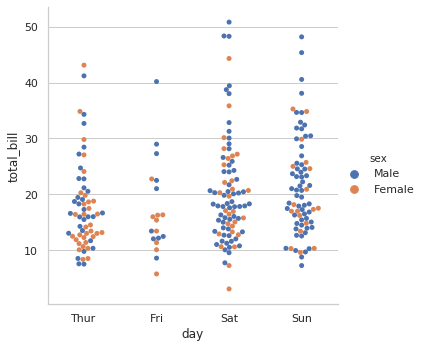

In [25]:
sns.catplot(x="day", y="total_bill", hue="sex", jitter=False, data=tips) # jitter:가로축상의 데이터를 바꾸어 겹치지 않도록함
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips) # swarm:점이 겹치지 않도록 옆으로 이동

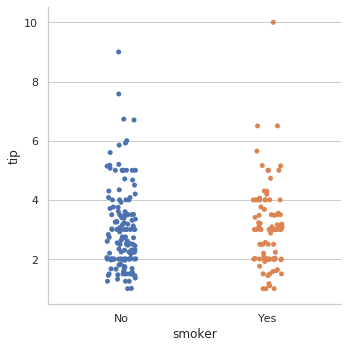

In [26]:
sns.catplot(x="smoker", y="tip", order=["No","Yes"], data=tips)

### 2) 막대 그래프

#### - barplot: 평균은 막대의 높이, 편차는 에러바로 표시

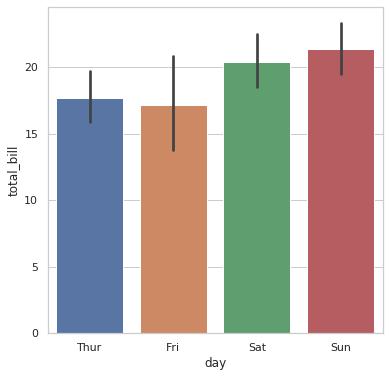

In [27]:
sns.barplot(x="day", y="total_bill", data=tips)

#### - group barplot _count

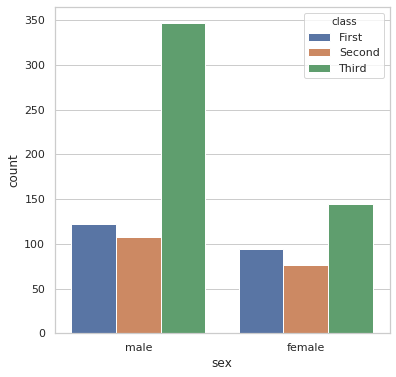

In [28]:
sns.countplot(x="sex", hue="class", data=ti) # hue:카테고리별

#### - group barplot

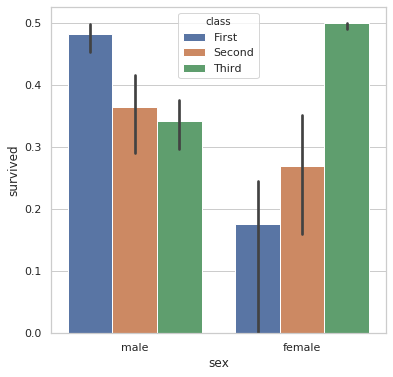

In [29]:
sns.barplot(x="sex", y="survived", hue="class", data=ti, estimator=np.std) # estimator:원하는 통계값

### 3) 박스 플롯

#### : 사분위수, 이상치 한번에 확인 가능

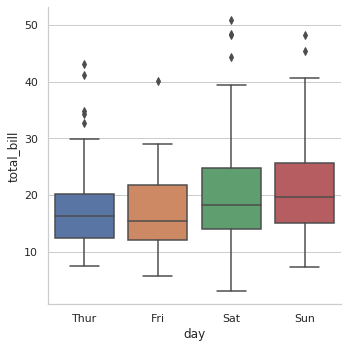

In [30]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

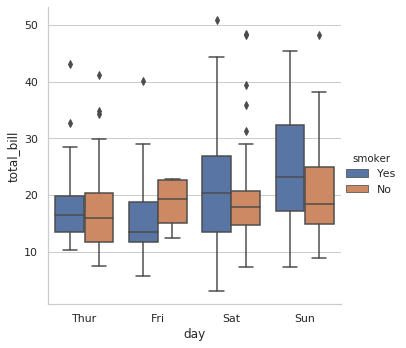

In [31]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker", data=tips)

### 4) 바이올린 플롯

#### : 세로 방향 커널 밀도 히스토그램

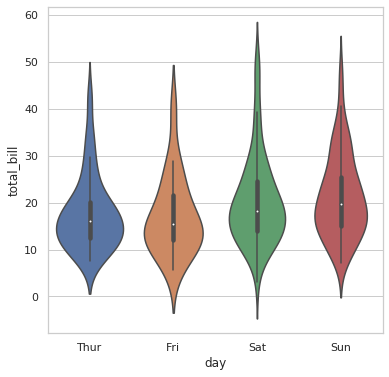

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips)

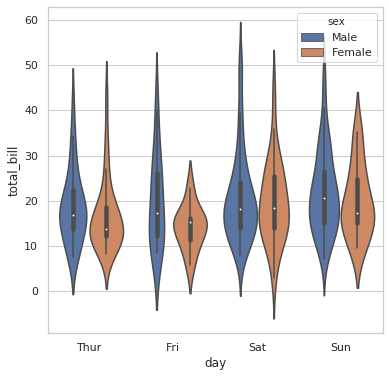

In [33]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

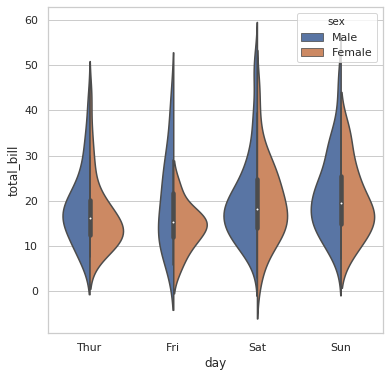

In [34]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

### 5) 히트맵

#### : 두개의 카테고리 값에 의한 실수 값 변화

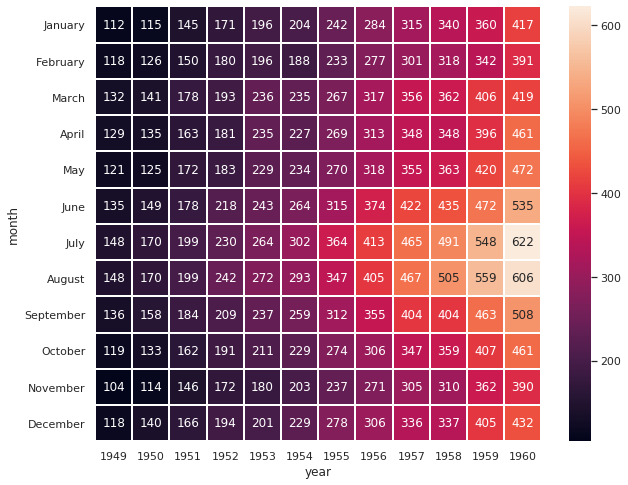

In [35]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.figure(figsize = (10,8))
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)

## 4. 기타

### 1) 선형관계 확인

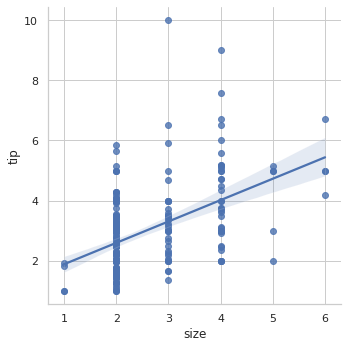

In [36]:
sns.lmplot(x="size", y="tip", data=tips)

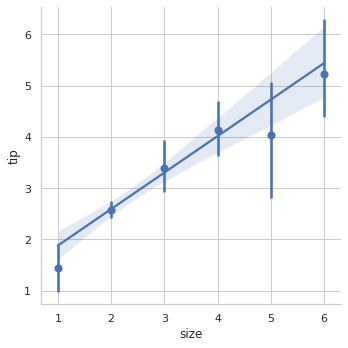

In [37]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean) # 이상치 제외하고 표시

#### - 카테고리별 데이터의 분포와 선형 관계 표시

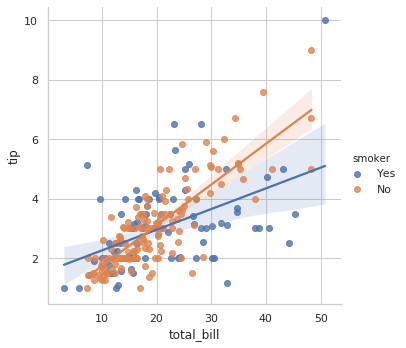

In [38]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

### 2) 차트 겹쳐 그리기

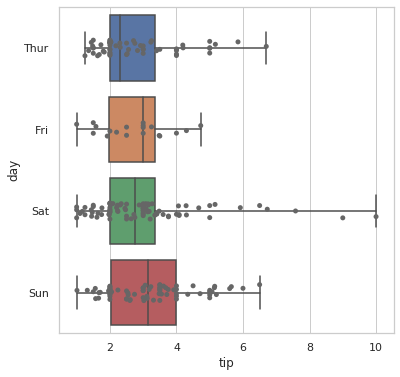

In [39]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")

### 3) 패싯 그리드

In [40]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


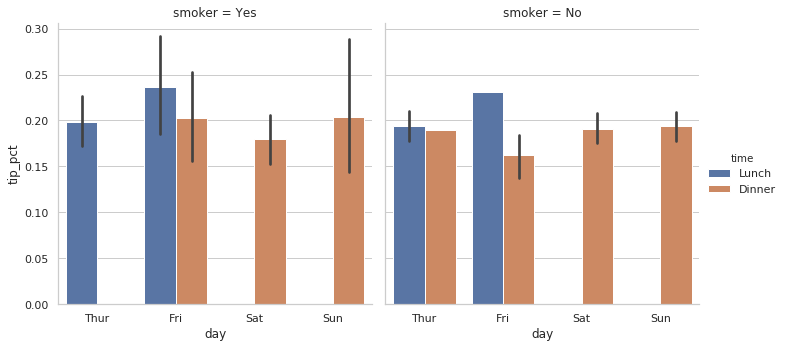

In [43]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

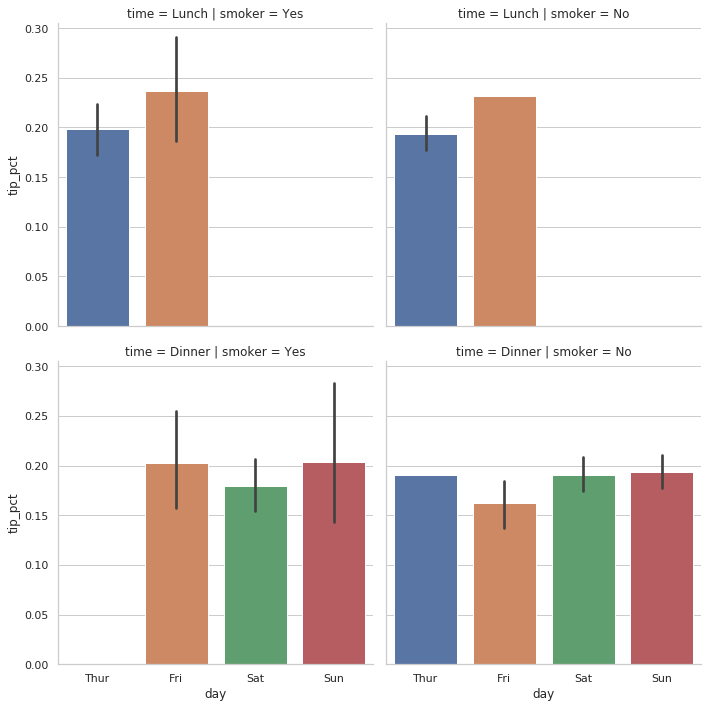

In [44]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

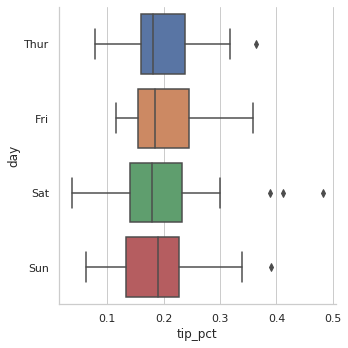

In [45]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

# Treemap

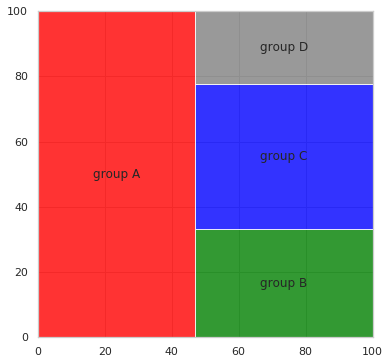

In [46]:
import squarify

df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

squarify.plot(sizes=df['nb_people'], label=df['group'], color=["red","green","blue", "grey"], alpha=.8 ) # color:색상 설정
#plt.axis('off')
plt.show()

# 누적막대그래프

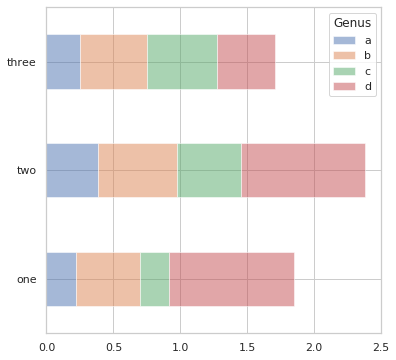

In [47]:
df = pd.DataFrame(np.random.rand(3,4),
                 index=['one', 'two','three'],
                 columns=pd.Index(['a', 'b', 'c', 'd'], name='Genus'))

df.plot.barh(stacked=True, alpha=0.5)

# Pie chart

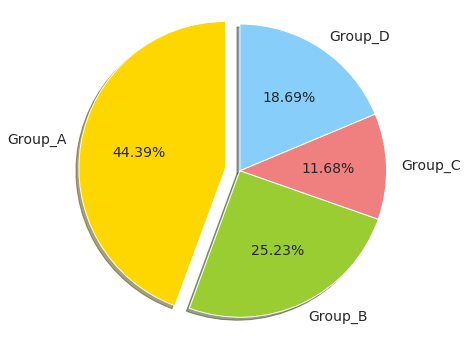

In [48]:
group_names = ['Group_A', 'Group_B', 'Group_C', 'Group_D']
group_sizes = [95, 54, 25, 40]
group_colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
group_explodes = (0.1, 0, 0, 0)

plt.pie(group_sizes, explode=group_explodes, labels=group_names, colors=group_colors, autopct='%1.2f%%', 
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

### - 하위 그룹을 포함한 도넛 그래프

In [49]:
subgroup_names = ['A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'C_1', 'C_2']
subgroup_sizes = [50, 30, 10, 5, 30, 20, 4, 20, 5]

a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues] # 색상
width_num = 0.4 # 넓이

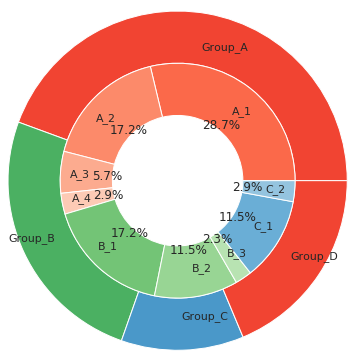

In [50]:
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(pie_outside, width=width_num, edgecolor='white')

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp(pie_inside, width=width_num, edgecolor='white')
plt.show()

# Directed Graph

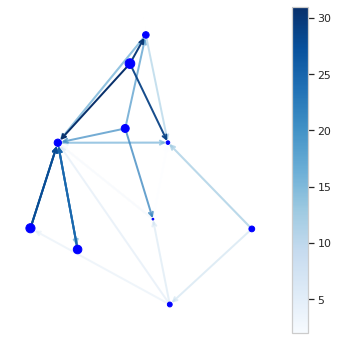

In [51]:
import matplotlib as mpl
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)

for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# 지도 시각화

### 1)

In [52]:
import folium

In [53]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=12)
folium.Marker(location=[37.5502, 126.982], popup="Marker A",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)
m

### 2)

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import platform

import matplotlib.font_manager as fm
font_path = fm.FontProperties(fname='NotoSansCJKkr-Bold.otf')
    
%matplotlib inline

In [67]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [68]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

gamma = 0.75

blockedMap = data_draw_korea
targetData = '인구수'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

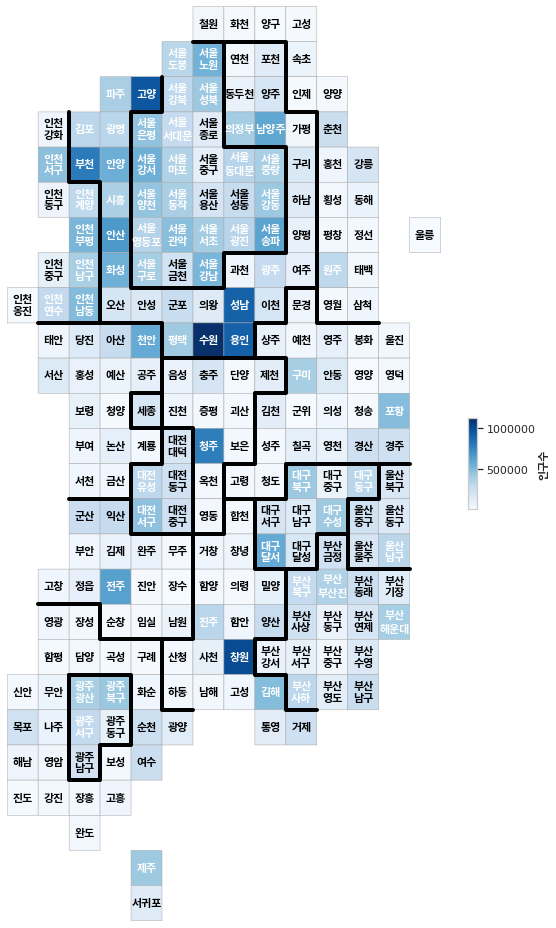

In [69]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing, fontproperties = font_path)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel, fontproperties = font_path)

plt.tight_layout()
plt.show()